In [1]:
#import os
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
melhousing = Path("melb_data1.csv")

In [3]:
melhousing_df=pd.read_csv(melhousing)
melhousing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [4]:
melhousing_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
BuildingArea      7130
YearBuilt         8205
CouncilArea      12211
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [5]:
melhousingclean_df=melhousing_df.drop(["BuildingArea","YearBuilt"],axis=1)
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      12211
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [6]:
melhousingclean_df["CouncilArea"]= melhousingclean_df["CouncilArea"].fillna(method="ffill")

C:\Users\h\AppData\Local\Temp\ipykernel_15916\2740069353.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  melhousingclean_df["CouncilArea"]= melhousingclean_df["CouncilArea"].fillna(method="ffill")


In [7]:
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      13580
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [8]:
melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'], dayfirst=True)
print(melhousingclean_df['Date'].dtype)







datetime64[ns]


C:\Users\h\AppData\Local\Temp\ipykernel_15916\536560956.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'], dayfirst=True)


In [9]:
melhousingclean_df['FormattedDate'] = melhousingclean_df['Date'].dt.strftime('%m/%d/%Y')
print(melhousingclean_df['FormattedDate'])
melhousingclean_df.head(20)

0        12/03/2016
1        02/04/2016
2        03/04/2017
3        03/04/2017
4        06/04/2016
            ...    
13575    08/26/2017
13576    08/26/2017
13577    08/26/2017
13578    08/26/2017
13579    08/26/2017
Name: FormattedDate, Length: 13580, dtype: object


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,FormattedDate
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2.5,3067,2,1,1.0,202,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,12/03/2016
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067,2,1,0.0,156,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,02/04/2016
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2.5,3067,3,2,0.0,134,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,03/04/2017
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2.5,3067,3,2,1.0,94,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,03/04/2017
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,2.5,3067,3,1,2.0,120,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,06/04/2016
5,Abbotsford,129 Charles St,2,h,941000,S,Jellis,2016-05-07,2.5,3067,2,1,0.0,181,Yarra,-37.8041,144.9953,Northern Metropolitan,4019,05/07/2016
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,2016-05-07,2.5,3067,4,2,0.0,245,Yarra,-37.8024,144.9993,Northern Metropolitan,4019,05/07/2016
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,2016-10-08,2.5,3067,2,1,2.0,256,Yarra,-37.8060,144.9954,Northern Metropolitan,4019,10/08/2016
8,Abbotsford,6/241 Nicholson St,1,u,300000,S,Biggin,2016-10-08,2.5,3067,1,1,1.0,0,Yarra,-37.8008,144.9973,Northern Metropolitan,4019,10/08/2016
9,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,2016-10-08,2.5,3067,3,1,2.0,220,Yarra,-37.8010,144.9989,Northern Metropolitan,4019,10/08/2016


In [10]:
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      13580
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
FormattedDate    13580
dtype: int64

In [20]:
melhousing_data = melhousingclean_df[(melhousingclean_df["Type"] == "h") & (melhousingclean_df["Rooms"] <= 2) & (melhousingclean_df["Bedroom2"] == 2) & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data.head()

,Suburb,Type,Distance,Rooms,Bedroom2,Bathroom,Landsize,Car,Price
0,Abbotsford,h,2.5,2,2,1,202,1.0,1480000
13,Abbotsford,h,2.5,2,2,1,195,1.0,1172500
19,Abbotsford,h,2.5,2,2,1,150,1.0,890000
24,Abbotsford,h,2.5,2,2,2,124,1.0,1100000
37,Abbotsford,h,2.5,2,2,1,172,1.0,1030000


In [21]:
#Linear Regression between Type of House vs Price
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

The r-squared is: 0.10708291059975715


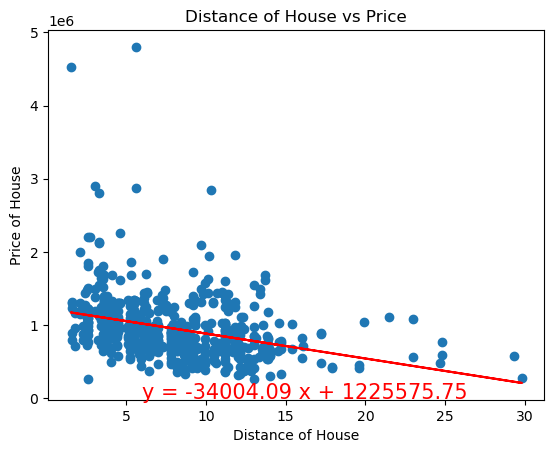

In [22]:
x_values = melhousing_data["Distance"]
y_values = melhousing_data["Price"]
plt.title("Distance of House vs Price")
plt.xlabel("Distance of House")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "Distance of House vs Price", (6, 30))

In [23]:
melhousing_data1 = melhousingclean_df[(melhousingclean_df["Type"] == "u") & (melhousingclean_df["Rooms"] <= 2) & (melhousingclean_df["Bedroom2"] == 2) & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data1.head()

,Suburb,Type,Distance,Rooms,Bedroom2,Bathroom,Landsize,Car,Price
10,Abbotsford,u,2.5,2,2,2,0,1.0,700000
12,Abbotsford,u,2.5,2,2,2,0,1.0,750000
23,Abbotsford,u,2.5,2,2,1,0,1.0,500000
44,Airport West,u,13.5,2,2,1,168,1.0,500000
49,Airport West,u,13.5,2,2,1,141,1.0,515000


The r-squared is: 0.026614816974144376


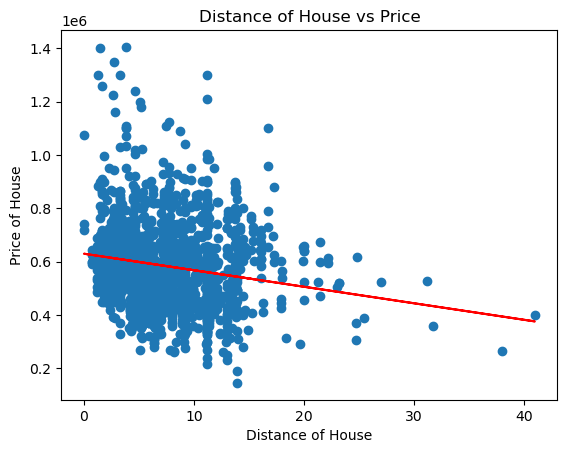

In [24]:
x_values = melhousing_data1["Distance"]
y_values = melhousing_data1["Price"]
plt.title("Distance of House vs Price")
plt.xlabel("Distance of House")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "Distance of House vs Price", (6, 30))

In [25]:
melhousing_data2 = melhousingclean_df[(melhousingclean_df["Type"] == "h") & (melhousingclean_df["Rooms"] > 2) & (melhousingclean_df["Bedroom2"] >2) & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data2.head()

,Suburb,Type,Distance,Rooms,Bedroom2,Bathroom,Landsize,Car,Price
3,Abbotsford,h,2.5,3,3,2,94,1.0,850000
16,Abbotsford,h,2.5,3,3,2,113,1.0,1200000
27,Abbotsford,h,2.5,3,3,3,166,1.0,1447500
30,Abbotsford,h,2.5,4,4,3,0,1.0,1542000
32,Abbotsford,h,2.5,3,3,1,168,1.0,1290000


The r-squared is: 0.19834004935978328


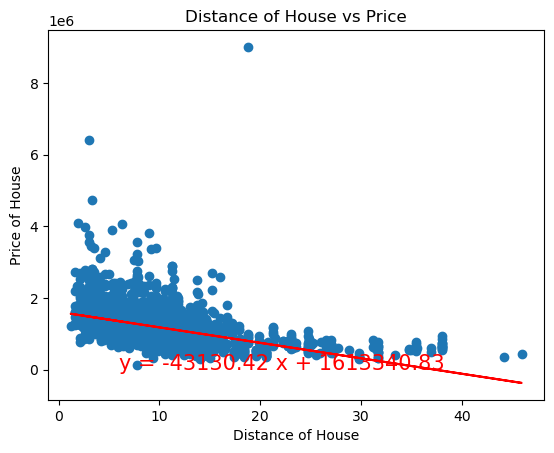

In [26]:
x_values = melhousing_data2["Distance"]
y_values = melhousing_data2["Price"]
plt.title("Distance of House vs Price")
plt.xlabel("Distance of House")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "Distance of House vs Price", (6, 30))

In [29]:
melhousing_data3 = melhousingclean_df[(melhousingclean_df["Type"] == "u") & (melhousingclean_df["Rooms"] > 2) & (melhousingclean_df["Bedroom2"] >2) & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data3.tail()

,Suburb,Type,Distance,Rooms,Bedroom2,Bathroom,Landsize,Car,Price
12430,Albion,u,10.5,3,3,1,284,1.0,675000
12434,Ascot Vale,u,4.3,3,3,2,3215,1.0,870000
12718,Essendon North,u,8.2,3,3,2,292,1.0,1170000
12853,Surrey Hills,u,10.2,3,3,2,270,1.0,1290000
13164,Donvale,u,16.1,3,3,2,294,1.0,775000


The r-squared is: 0.19274936553861424


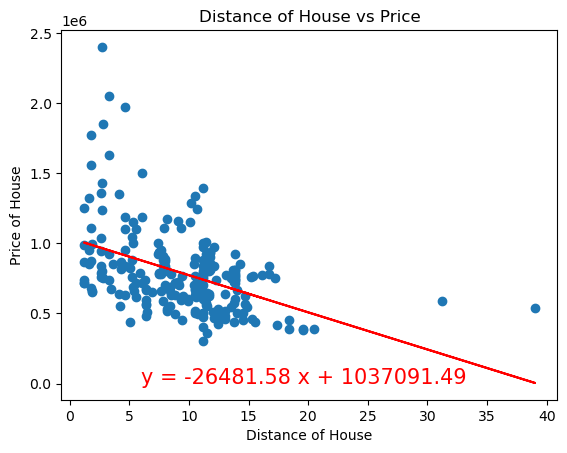

In [28]:
x_values = melhousing_data3["Distance"]
y_values = melhousing_data3["Price"]
plt.title("Distance of House vs Price")
plt.xlabel("Distance of House")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "Distance of House vs Price", (6, 30))

In [31]:
melhousing_data3 = melhousingclean_df[(melhousingclean_df["Type"] == "h") & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data3.tail()

,Suburb,Type,Distance,Rooms,Bedroom2,Bathroom,Landsize,Car,Price
13562,Thornbury,h,7.0,3,3,1,312,1.0,1450000
13564,Tullamarine,h,12.9,3,3,1,607,1.0,540000
13572,Watsonia,h,14.5,2,2,1,210,1.0,650000
13573,Werribee,h,14.7,4,4,2,662,1.0,635000
13579,Yarraville,h,6.3,4,4,1,362,1.0,1285000


The r-squared is: 0.06556677819197264


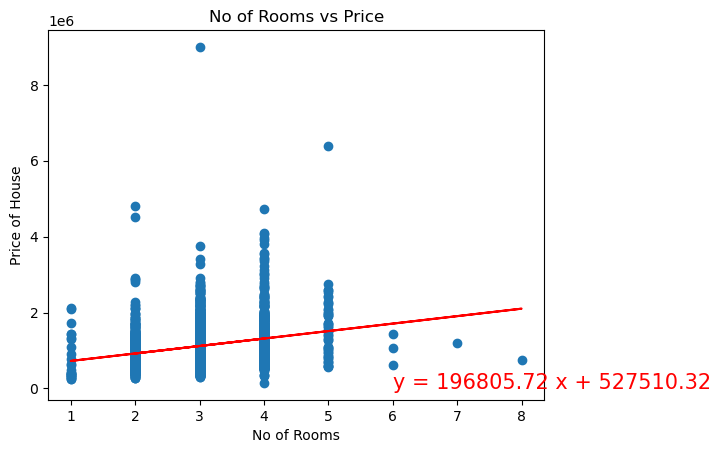

In [32]:
x_values = melhousing_data3["Rooms"]
y_values = melhousing_data3["Price"]
plt.title("No of Rooms vs Price")
plt.xlabel("No of Rooms")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "No of Rooms vs Price", (6, 30))

In [33]:
melhousing_data4 = melhousingclean_df[(melhousingclean_df["Type"] == "u") & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data4.tail()

,Suburb,Type,Distance,Rooms,Bedroom2,Bathroom,Landsize,Car,Price
13449,Highett,u,16.0,2,2,1,158,1.0,680500
13453,Hoppers Crossing,u,18.4,2,2,1,150,1.0,315000
13482,Malvern East,u,8.4,2,2,1,129,1.0,651000
13495,Moonee Ponds,u,6.2,2,2,1,1475,1.0,435000
13510,Nunawading,u,15.4,2,2,1,903,1.0,710000


The r-squared is: 0.2923350562770316


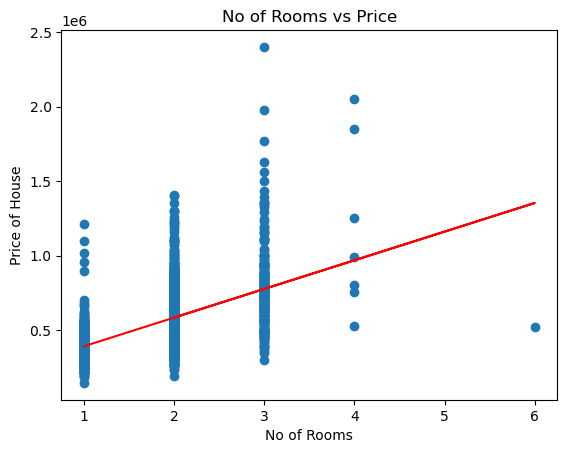

In [35]:
x_values = melhousing_data4["Rooms"]
y_values = melhousing_data4["Price"]
plt.title("No of Rooms vs Price")
plt.xlabel("No of Rooms")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "No of Rooms vs Price", (1, 10))

In [37]:
melhousing_data5 = melhousingclean_df[(melhousingclean_df["Type"] == "h") & (melhousingclean_df["Car"] > 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data5.tail()

,Suburb,Type,Distance,Rooms,Bedroom2,Bathroom,Landsize,Car,Price
13574,Westmeadows,h,16.5,3,3,2,256,2.0,582000
13575,Wheelers Hill,h,16.7,4,4,2,652,2.0,1245000
13576,Williamstown,h,6.8,3,3,2,333,2.0,1031000
13577,Williamstown,h,6.8,3,3,2,436,4.0,1170000
13578,Williamstown,h,6.8,4,4,1,866,5.0,2500000


The r-squared is: 0.11743329741418507


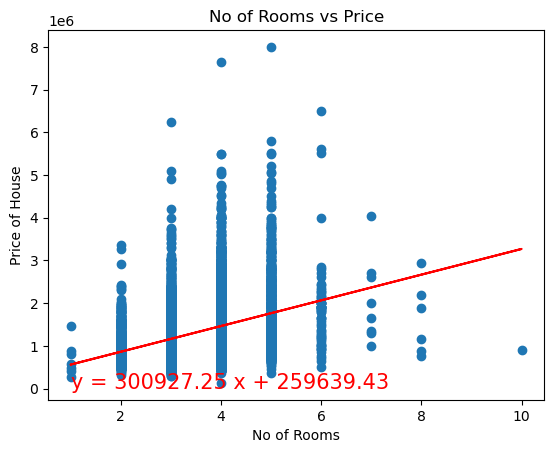

In [38]:
x_values = melhousing_data5["Rooms"]
y_values = melhousing_data5["Price"]
plt.title("No of Rooms vs Price")
plt.xlabel("No of Rooms")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "No of Rooms vs Price", (1, 10))